In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # For mac users with Retina display
from matplotlib import pyplot as plt
import numpy as np
import dill as pickle
import os
import sys
import pygtc
import corner 

pwd = os.getcwd()
little_things_root_dir = os.path.dirname(pwd)
sys.path.append(little_things_root_dir)

little_things_root_dir = little_things_root_dir + '/notebooks/'

In [2]:
file_name = ['DDO43 pkl/sampler_04-Apr-2020.pkl', 
                'DDO52 pkl/sampler_03-Apr-2020.pkl', 
               'DDO168 pkl/sampler_15-Apr-2020.pkl', 
               'DDO154 pkl/sampler_16-Apr-2020.pkl', 
               'DDO46 pkl/sampler.pkl']

In [3]:
rs = []
rhos = []

for i in file_name:
   with open(little_things_root_dir + i, 'rb') as f:
        sampler_i = pickle.load(f)
        rhos_chain_i = sampler_i.chain[:, :, 0]
        rhos.append(rhos_chain_i)
        rs_chain_i = sampler_i.chain[:, :, 1]
        rs.append(rs_chain_i)

In [6]:
rs_DDO43 = rs[0].flatten()
rhos_DDO43 = rhos[0].flatten()

x = np.transpose(rs_DDO43)
y = np.transpose(rhos_DDO43)
print(rs_DDO43.shape)
print(rhos_DDO43.shape)
print("=========================")
print("=========================")
print(x.shape)
print(y.shape)

(10000,)
(10000,)
(10000,)
(10000,)


In [7]:
def convert(list): 
    return tuple(list)

GTC = pygtc.plotGTC(chains=[x,y])

TypeError: %d format: a number is required, not numpy.ndarray

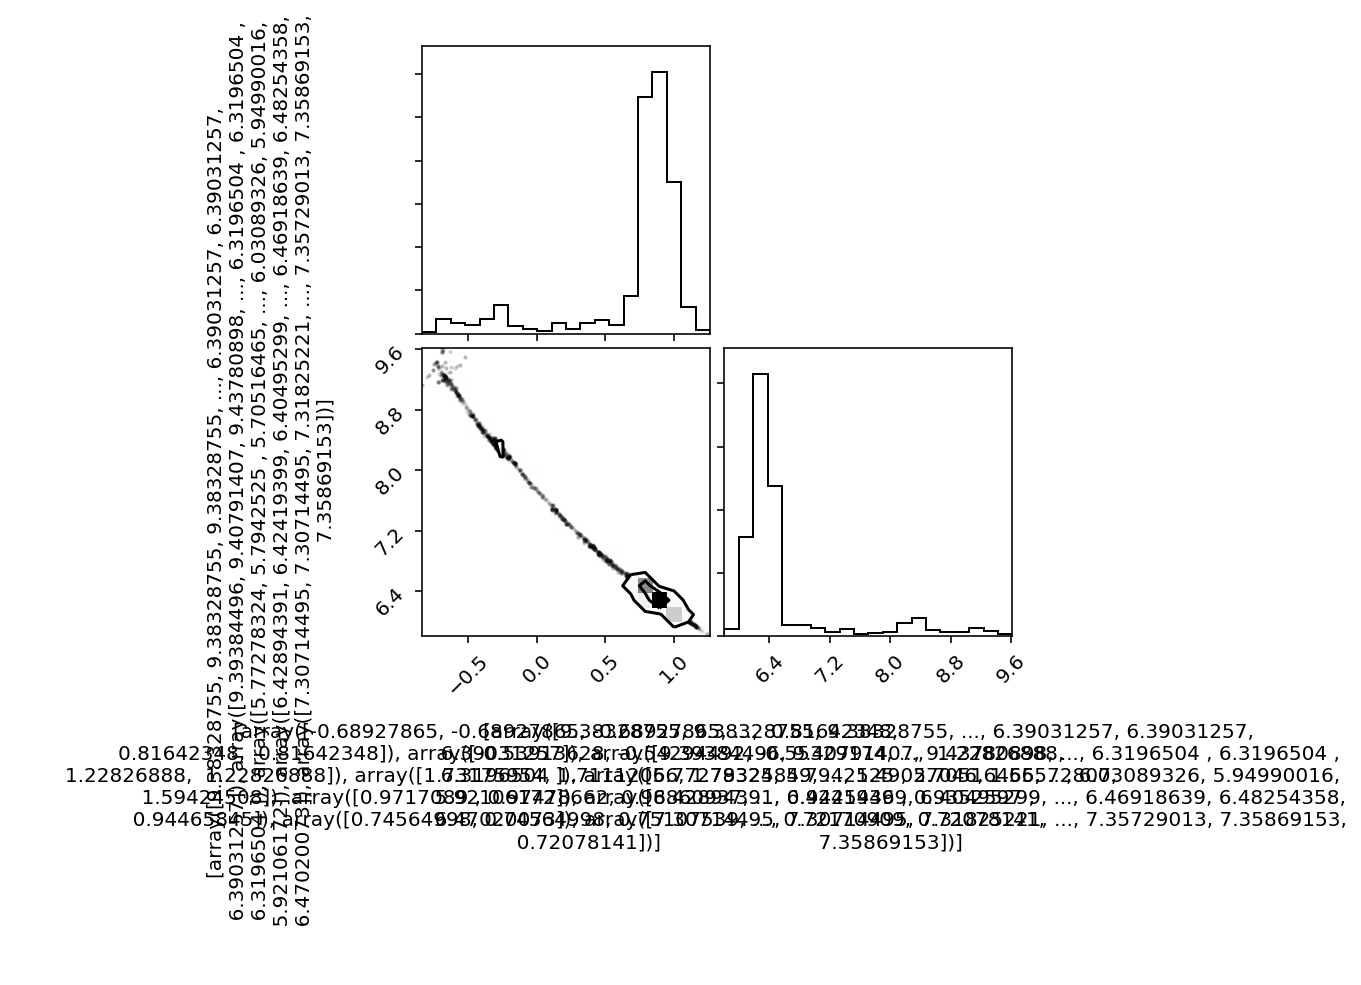

In [21]:
figure = corner.corner(data, labels=[rs,rhos])

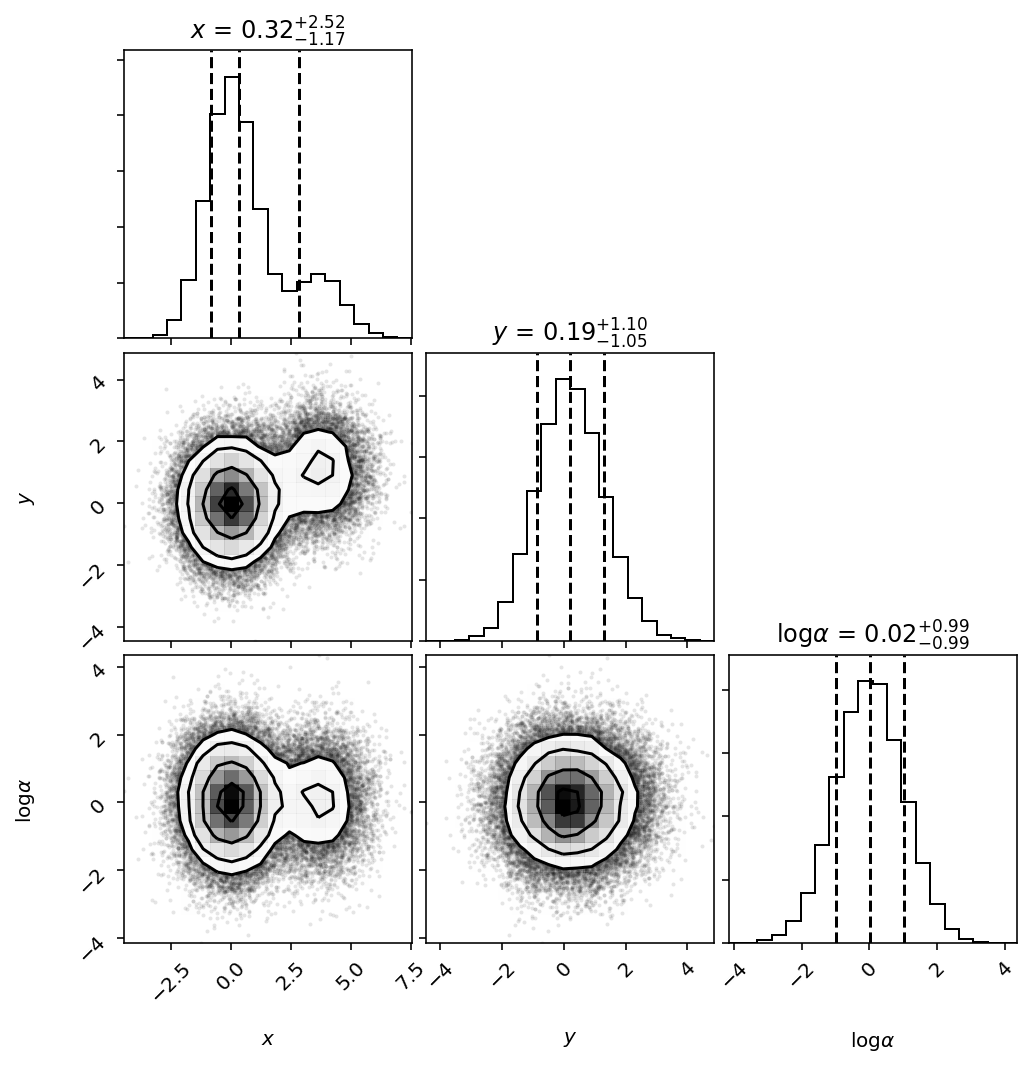

In [13]:
ndim, nsamples = 3, 50000

# Generate some fake data.
np.random.seed(42)
data1 = np.random.randn(ndim * 4 * nsamples // 5).reshape([4 * nsamples // 5, ndim])
data2 = (4*np.random.rand(ndim)[None, :] + np.random.randn(ndim * nsamples // 5).reshape([nsamples // 5, ndim]))
data = np.vstack([data1, data2])

# Plot it.
figure = corner.corner(data, labels=[r"$x$", r"$y$", r"$\log \alpha$", r"$\Gamma \, [\mathrm{parsec}]$"],
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12})

In [18]:
print(data1.shape)
print("=========================")
print(data2)
print("=========================")
print(data)

(40000, 3)
[[ 3.62122726  1.10938346 -0.18547873]
 [ 3.73708891 -0.39422574  0.78504262]
 [ 3.11365858  1.91408155 -1.69142   ]
 ...
 [ 2.64454574  1.61436808  1.11433854]
 [ 1.61445557  0.85716545  0.84458672]
 [ 4.80682382  4.28364397  0.34261772]]
[[-0.68927865 -0.68927865 -0.68927865 ...  0.81642348  0.81642348
   0.81642348]
 [ 9.38328755  9.38328755  9.38328755 ...  6.39031257  6.39031257
   6.39031257]]
